In [256]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math
from scipy.optimize import root_scalar

def restricao1(n):
  """Restrição de n >= 0"""
  penalidade = 10e12
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0

  return penalidade * (max([0, -n + 1.0])**2)

def restricao2(r):
  """Restrição de v <= vc"""
  vc = 20.0
  penalidade = 10e12
  g, m, kc = 9.8, 100.0, 0.42
  c = kc * 2 * np.pi * (r**2)
  z0 = 500

  def posicao (t):
    return z0 - ((g * m) / c)*t + ((g * (m**2)) / (c**2))*(1 - np.e**(-(c / m)*t))

  try:
    sol = root_scalar(posicao, method='bisect', bracket=[0.0, 10000])
  except ValueError:
    print(c, r)

  if sol.converged:
    t = sol.root
  else:
    print("Não convergiu")

  # print(t)
  velocidade = ((g * m) / c)*(1 - np.e**(-(c / m)*t)) - vc

  return penalidade * (max([0, velocidade])**2)

def custo(lmbda, constantes, x, d):
  """Função que representa o custo para se fabricar os paraquedas."""
  [c0, c1, c2] = constantes
  [n, r] = x
  [d1, d2] = d

  n = n + lmbda * d1
  r = r + lmbda * d2

  penalidade1 = restricao1(n)
  penalidade2 = restricao2(r)

  return n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2) + penalidade1 + penalidade2

def goldenSectionSearch (intervalo, constantes, x, d):
  """Função que faz uma busca unidimensional, usando o algoritmo da Seção Áurea"""

  [a, b] = intervalo
  razaoAurea = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    p = razaoAurea * (b - a)
    xa = a + p
    xb = b - p
    fxa = custo(xa, constantes, x, d)
    fxb = custo(xb, constantes, x, d)

    if math.fabs(xb - xa) < e:
      break

    if fxa >= fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  # print(f"Iterações Golden Section: {time}")
  
  return xa

In [257]:
def plot3D(min, constantes, range=5):
    [c0, c1, c2] = constantes
    """Função que plota um gráfico 3D da superfície que representa a função custo."""
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    ax.plot_surface(n, r, z, rstride=1, cstride=1, cmap='viridis')
    
    ax.scatter(min[0], min[1], min[0] * (c0 + c1*(np.sqrt(2)*min[1]) + c2*(2*np.pi*(min[1]**2))**2), color='red')

def plotContour(min, constantes, range=5):
    """Função que plota as curvas de nível da superfície que representa a função custo."""
    [c0, c1, c2] = constantes
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'Contorno Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    # Contorno da função
    ax.contour(n, r, z, colors='blue')

    # Ponto de mínimo encontrado
    ax.scatter(min[0], min[1], color='red')

    plt.show()


======== Resultado Hooke Jeeves



Ponto 1: (1.49816047538945, 0.125716742746937) min=[1.0000016777752558, 4.309065328621335]
Ponto 2: (3.8028572256396647, 2.5456416450551216) min=[0.9999999988510995, 4.309065743611059]
Ponto 3: (2.9279757672456204, 1.2574239243053067) min=[1.0000009811829647, -4.30906532861782]
Ponto 4: (2.3946339367881464, 2.034282764658811) min=[0.9999999991705801, 4.309067217484974]
Ponto 5: (0.6240745617697461, 3.630265895704372) min=[0.9999999996664654, 4.309066865225234]
Ponto 6: (0.6239780813448106, 0.9971689165954998) min=[0.9999999986538031, 4.309066200609647]
Ponto 7: (0.23233444867279784, 1.641531692142519) min=[0.9999999992311557, 4.309066961485526]
Ponto 8: (3.4647045830997407, 3.0222045541721947) min=[1.0000004586014326, 4.309065328618181]
Ponto 9: (2.404460046972835, 0.9151926619664899) min=[1.0000014688547405, -4.309065328612455]
Ponto 10: (2.832290311184182, 0.30791963931517197) min=[0.9999999993129909, -4.309065899928578]
Ponto 11: (0.08233797718320979, 1.159005811655072) min=[0.99999

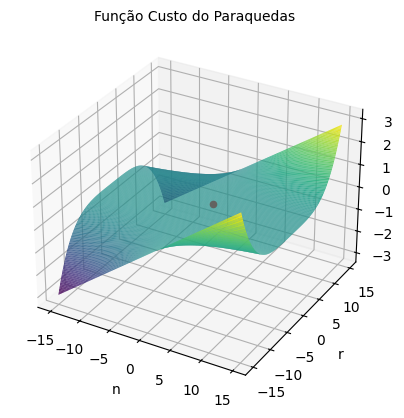

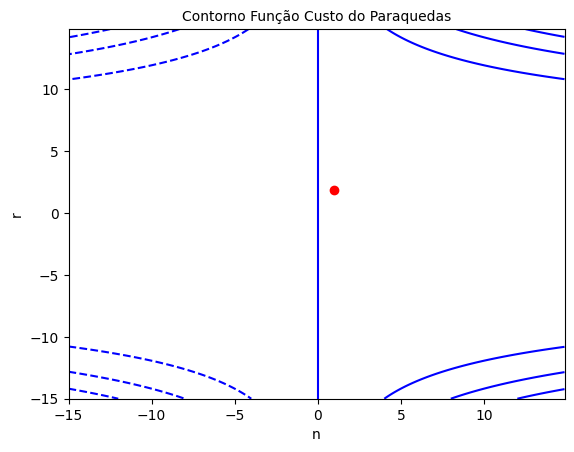

In [258]:
def hookeJeeves(valorInicial, constantes, dimensao):
    """Função que implementa o método de busca multivariável Hooke Jeeves."""
    n, r = valorInicial[0], valorInicial[1]
    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-2
    k = 0
    timeout = 100
    time = 0
    novoPonto = np.array([0.0, 0.0])
    pontoInicial = np.copy([n, r])
    tamanhoIntervalo = 10
    
    while time < timeout:
           
        # print(f'\nIteração {time}==========================')
        # print(f'Início: {pontoInicial}')
        
        for k in range(dimensao):          
            d1, d2 = d[k][0], d[k][1]

            intervalo = [-tamanhoIntervalo + n if k == 0 else -tamanhoIntervalo + r, tamanhoIntervalo + n if k == 1 else tamanhoIntervalo + r]

            lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

            n, r = n + lmbda * d1, r + lmbda * d2

            # print(f'Busca {d[k]}: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')
        
        novoPonto = np.array([n, r])

        direcaoPrincip = novoPonto - pontoInicial

        d1, d2 = direcaoPrincip[0], direcaoPrincip[1]

        intervalo = [-tamanhoIntervalo + n , tamanhoIntervalo + r]
        lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

        n, r = n + lmbda * d1, r + lmbda * d2

        if LA.norm([n, r] - pontoInicial) < e:
            break

        # print(f'Busca [{d1},{d2}]: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')

        pontoInicial = novoPonto
        
        time += 1

    return [n, r]

semente = 42
np.random.seed(semente)

qtdPontos = 100
X = np.random.uniform(0, 4, qtdPontos)
Y = np.random.uniform(0, 4, qtdPontos)

points = list(zip(X, Y))

minimos = []
constantes = [1.0, 2.0, 1.0]

print(f'======== Resultado Hooke Jeeves\n')
for i, (x, y) in enumerate(points, start=1):
    min = hookeJeeves([x, y], constantes, 2)
    print(f'Ponto {i}: ({x}, {y}) min={min}')
    minimos.append(min)

minimos = np.array(minimos)
media = np.array([np.mean(minimos[:, 0]), np.mean(minimos[:, 1])])
desvioPadrao = np.array([np.std(minimos[:, 0]), np.std(minimos[:, 1])])
 
print(f'\nMédia dos valores: {media}')
print(f'Desvio Padrão dos valores: {desvioPadrao}')

plot3D(media, constantes, 15)
plotContour(media, constantes, 15)